# Redes Neuronales

Una red neuronal es un programa de software que intenta imitar el comportamiento del cerebro y sus componentes. El concepto de red hace referencia que es una agrupación de elementos unitarios llamados neuronas.

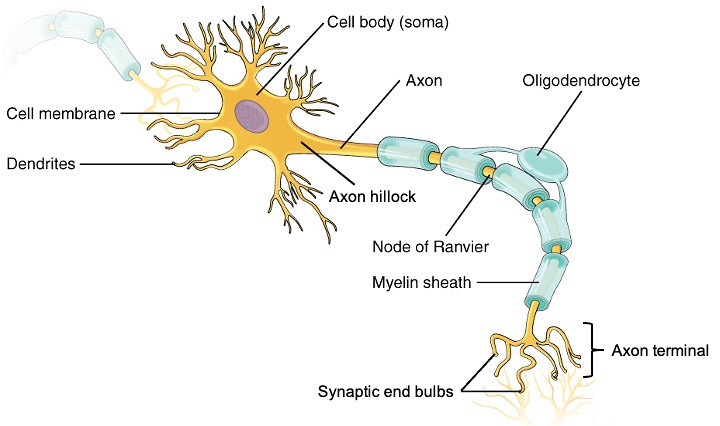


## ¿Cómo funcionan las redes neuronales biológicas?

Las redes neuronales biológicas en el cerebro humano se componen de neuronas interconectadas por sinapsis, formando redes que permiten la transmisión y el procesamiento de información. A través de las sinapsis, las neuronas transmiten impulsos eléctricos y químicos, facilitando la comunicación y el intercambio de información esencial para funciones cognitivas y motoras.


En nuestros cerebros las neuronas estan posicionadas de una manera tal que forman caminos para los impulsos eléctricos (pensamientos). Las neuronas de una misma red se comunican mediante un proceso llamado 'sinapsis'.

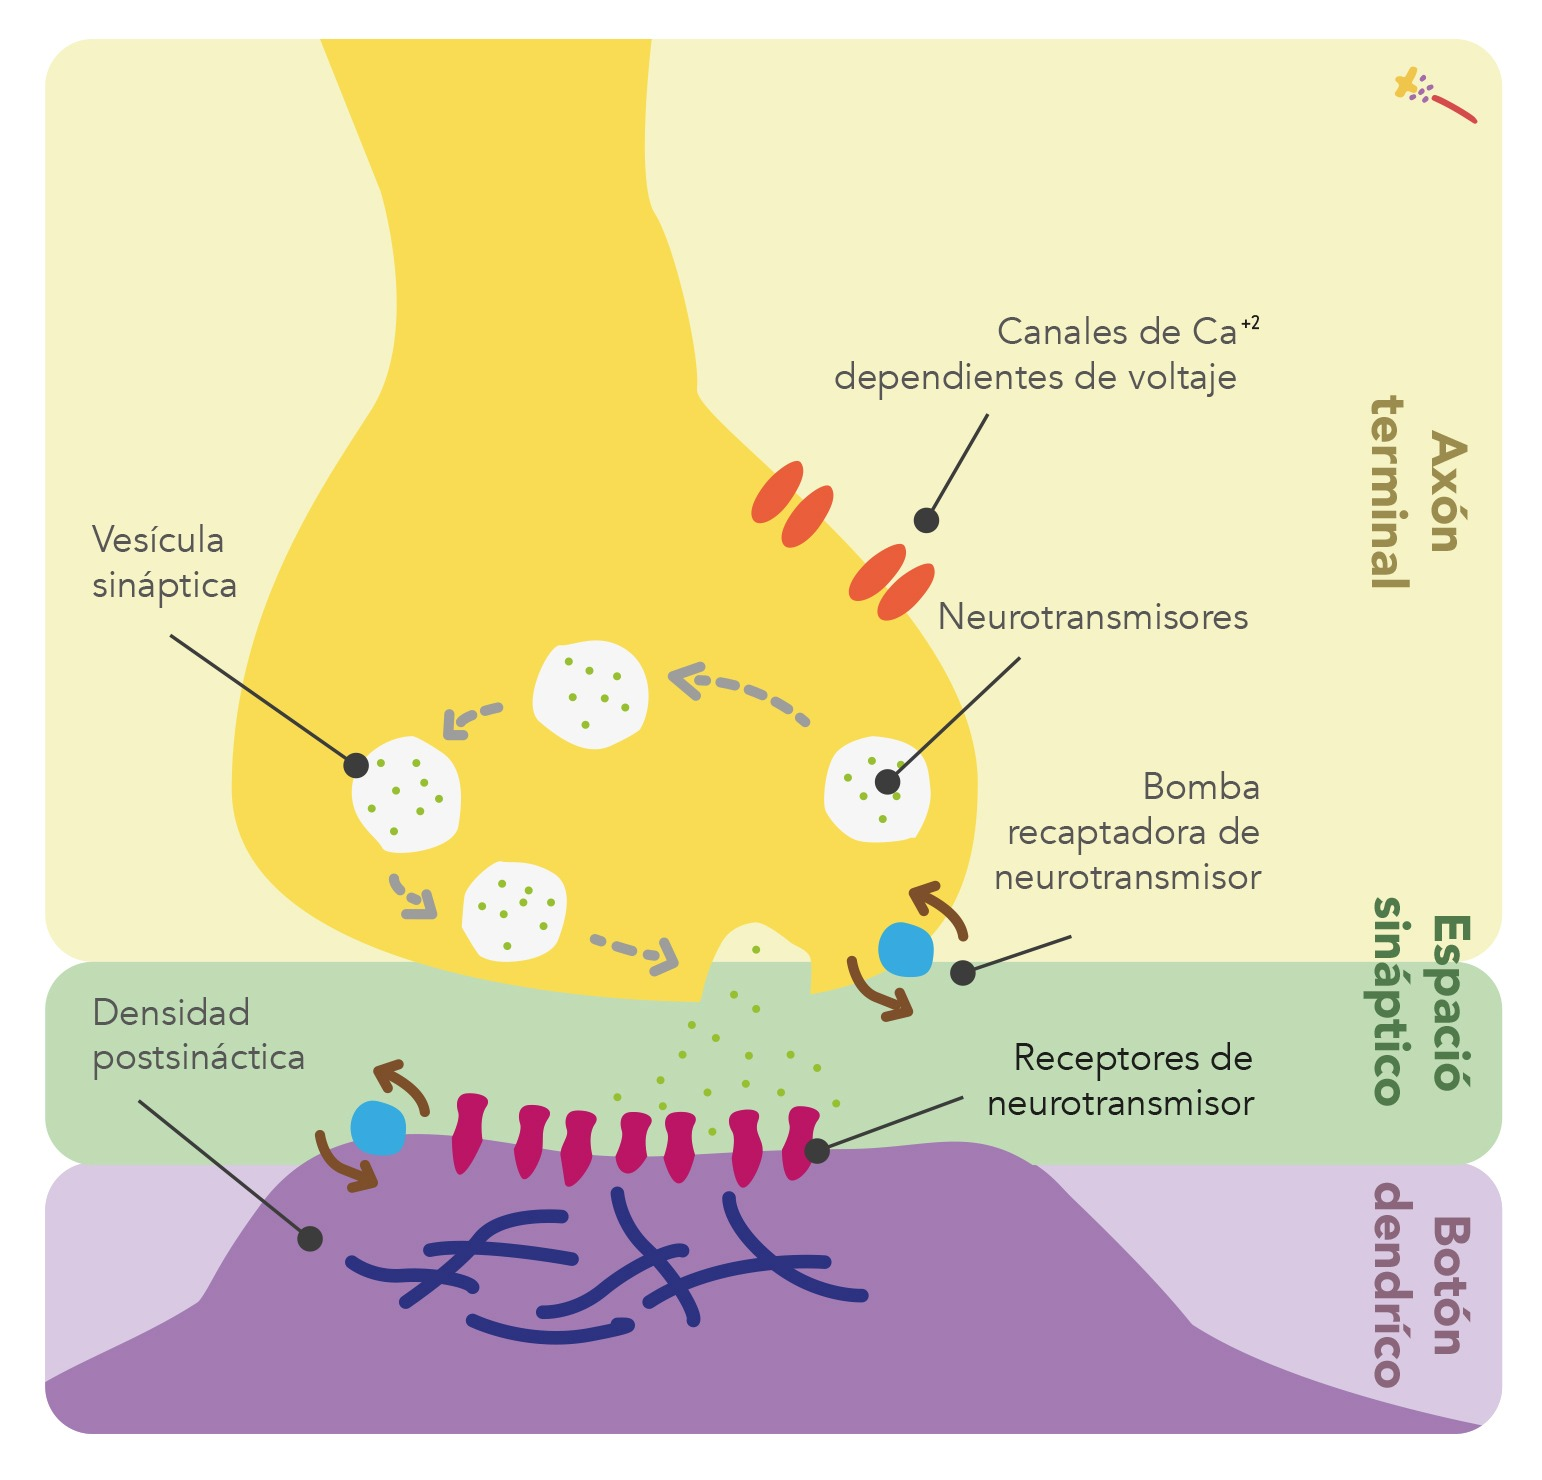


En este proceso de sinapsis, se transmite información de una neurona a la siguiente. Pero no acaba todo ahí, porque la transmisión de información es bidireccional: el impulso eléctrico recorre el 'camino' de neuronas hacia delante, y luego hacia detrás.


## Redes Neuronales Artificiales

Se componen de neuronas artificiales o nodos organizados en capas. La información se introduce a través de la capa de entrada, se procesa en capas ocultas mediante funciones de activación y se concluye en la capa de salida. La sinapsis biológica, que permite la comunicación entre neuronas mediante neurotransmisores, se emula con pesos en las conexiones entre neuronas artificiales, ajustándose durante el entrenamiento para optimizar la red.

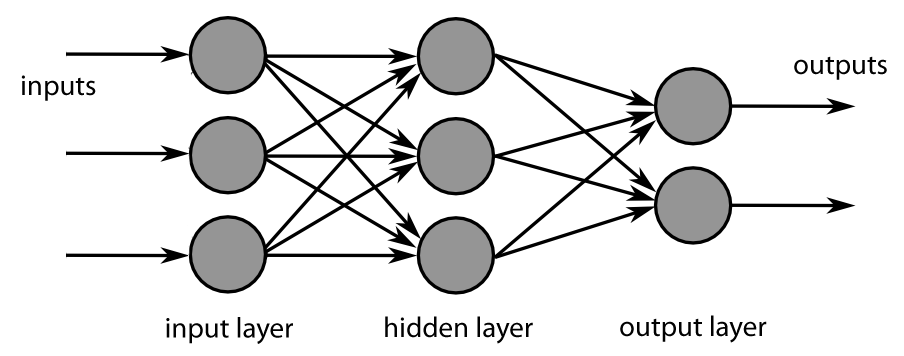


### Perceptron
Es el modelo matemático más simple que se puede hacer de una neurona, donde la salida de la misma se calcula como combinación lineal de sus entradas. Las limitaciones de este enfoque son principalmente que sólo permite separar los registros mediante un hiperplano

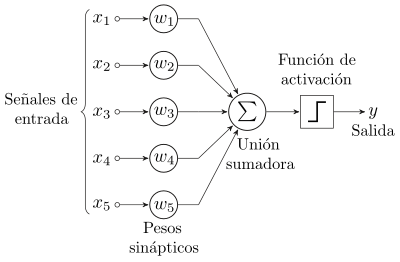

$ f(x) = 1$ if $w*x > u$ $ else 0,

 siendo u el umbral (término constante), y w*x el producto escalar de los pesos y el vector de entrada =>
$w*x = \sum{w_{i} * x_{i}}$

 que da como resultado un escalar


### Ejemplo 1
#### Clasificación con perceptrón

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [2]:
# Inicialización de parámetros
umbral = 0.5
tasa_de_aprendizaje = 0.1
pesos = [0, 0, 0]
conjunto_de_formación = [((1, 0, 0), 1), ((1, 0, 1), 1), ((1, 1, 0), 1), ((1, 1, 1), 0)]

In [3]:

def producto_punto(valores, pesos):
    return sum(valor * peso for valor, peso in zip(valores, pesos))

def funcion_activacion(suma_ponderada):
    return 1 if suma_ponderada > umbral else 0


network   = lambda x,y: funcion_activacion(producto_punto(x,y))                             # f(x) = 1  if w*x > u , else 0

while True:
    contador_de_errores = 0
    for vector_de_entrada, salida_deseada in conjunto_de_formación:
        result = network(vector_de_entrada, pesos)
        error  = salida_deseada - result
        if error != 0:
            contador_de_errores += 1
            for indice, valor in enumerate(vector_de_entrada):
                pesos[indice] += tasa_de_aprendizaje * error * valor
    if contador_de_errores == 0:
        break

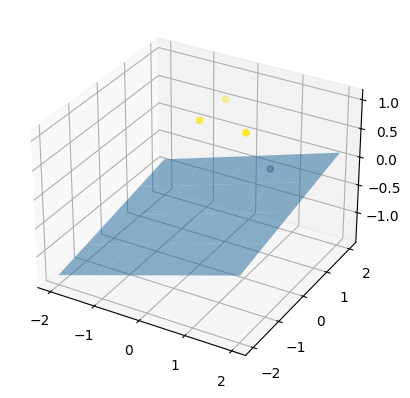

In [4]:
# Visualización
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs = [p[0][1] for p in conjunto_de_formación]
ys = [p[0][2] for p in conjunto_de_formación]
zs = [p[1] for p in conjunto_de_formación]
ax.scatter(xs, ys, zs, c=zs, marker='o')

xx, yy = np.meshgrid(range(-2,3), range(-2,3))
zz = (-pesos[1] * xx - pesos[2] * yy - umbral) / pesos[0]

ax.plot_surface(xx, yy, zz, alpha=0.5)
plt.show()

### Ejemplo 2
#### Regresión con perceptrón

In [5]:
import pandas as pd

df = pd.read_csv('/home/jd/Documentos/CODIGO/Machine-Learning/tutorials/ai-from-scratch/resources/btc.csv')
df = df[['unix','open']].rename(columns={"unix": "ts", "open": "precio"})
df

,ts,precio
0,1646092800,43221.71
1,1646006400,37717.10
2,1645920000,39146.66
3,1645833600,39242.64
4,1645747200,38360.93
...,...,...
2646,1417478400,378.39
2647,1417392000,376.40
2648,1417305600,376.57
2649,1417219200,376.42


In [6]:
# Parámetros iniciales
tasa_de_aprendizaje = 0.01  
pesos = [0, 0]                                                                                   # [timestamp, sesgo]
df['ts_normalized'] = (df['ts'] - df['ts'].min()) / (df['ts'].max() - df['ts'].min())

# Función de predicción
def prediccion(timestamp, pesos):
    return pesos[0] * timestamp + pesos[1]  # w * timestamp + b

# Entrenamiento - proceso de aprendizaje
for _ in range(100): 
    for idx, row in df.iterrows():
        # feedforward
        precio_predicho = prediccion(row.ts_normalized, pesos)
        # calcular residuos
        error = row.precio - precio_predicho
        # Actualizar pesos con timestamp normalizado
        pesos[0] += tasa_de_aprendizaje * error * row.ts_normalized
        pesos[1] += tasa_de_aprendizaje * error

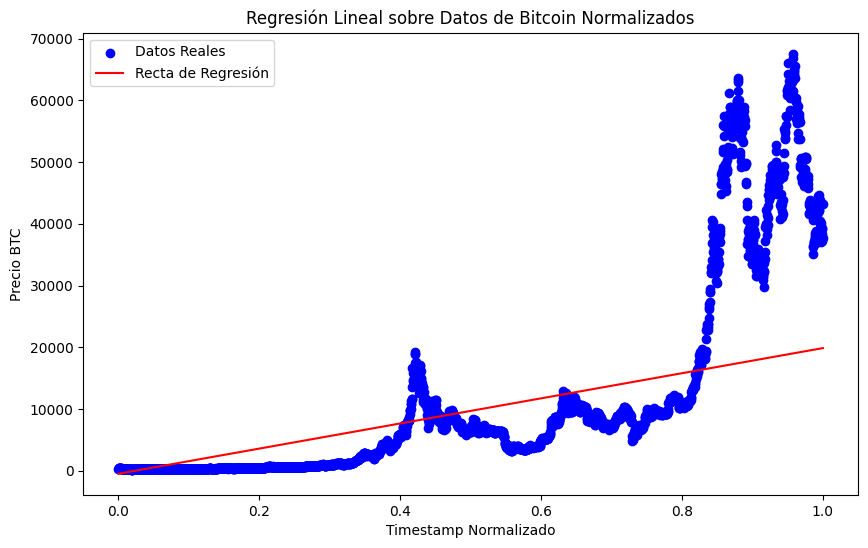

In [8]:
# Generar predicciones usando timestamps normalizados
precios_predichos = pesos[0] * df['ts_normalized'] + pesos[1]

# Ajustar la visualización
plt.figure(figsize=(10, 6))
plt.scatter(df['ts_normalized'], df['precio'], color='blue', label='Datos Reales')
plt.plot(df['ts_normalized'], precios_predichos, color='red', label='Recta de Regresión')
plt.title('Regresión Lineal sobre Datos de Bitcoin Normalizados')
plt.xlabel('Timestamp Normalizado')
plt.ylabel('Precio BTC')
plt.legend()
plt.show()

### Perceptrón multicapa